In [1]:
!pip install yfinance
!pip install pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 kB 256.2 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 156.8 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 206.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 199.2 kB/s eta 0:00:00a 0:00:01
  Created wheel for frozendict: filename=frozendict-2.4.2-cp311-cp311-macosx_11_0_arm64.whl size=15503 sha256=79763148f8b4e7cd7d8f8361bb5251d96ffcb1f683f6b3482881f45ae2c2085e
  Stored in directory: /Users/artemgolubnichiy/Library/Caches/pip/wheels/b6/d6/b5/da9ad65b3c11d2d2f3245b0b2476231dc58a2a91768c5ec755
  Created wheel for peewee: filename=peewee-3.17.3-cp311-cp311-

### Импорт библиотек и подготовка датасета

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name

df = pd.concat(company_list, axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-05-02,156.710007,158.229996,153.270004,157.960007,156.175293,123055300,APPLE
2022-05-03,158.149994,160.710007,156.320007,159.479996,157.678101,88966500,APPLE
2022-05-04,159.669998,166.479996,159.259995,166.020004,164.144211,108256500,APPLE
2022-05-05,163.850006,164.080002,154.949997,156.770004,154.998718,130525300,APPLE
2022-05-06,156.009995,159.440002,154.179993,157.279999,155.731430,116124600,APPLE


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-25,169.679993,173.919998,166.320007,173.669998,173.669998,49249400,AMAZON
2024-04-26,177.800003,180.820007,176.130005,179.619995,179.619995,43919800,AMAZON
2024-04-29,182.750000,183.529999,179.389999,180.960007,180.960007,54063900,AMAZON
2024-04-30,181.089996,182.990005,174.800003,175.000000,175.000000,94639800,AMAZON
2024-05-01,181.639999,185.149994,176.559998,179.000000,179.000000,94517500,AMAZON


### Описательная статистика

In [5]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,165.294672,167.040517,163.725328,165.468270,164.700721,6.827601e+07
std,18.682928,18.368971,18.911489,18.638103,18.944225,2.385143e+07
min,126.010002,127.769997,124.169998,125.019997,124.166641,2.404830e+07
25%,148.884995,150.930000,147.264999,149.375000,148.143021,5.123175e+07
50%,168.800003,170.080002,167.539993,168.490005,167.806427,6.381490e+07
75%,180.379997,182.079994,178.440002,180.640007,180.048973,7.823850e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.826020e+08


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2022-05-02 to 2024-05-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          503 non-null    float64
 1   High          503 non-null    float64
 2   Low           503 non-null    float64
 3   Close         503 non-null    float64
 4   Adj Close     503 non-null    float64
 5   Volume        503 non-null    int64  
 6   company_name  503 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.4+ KB


### Данные на момент закрытия

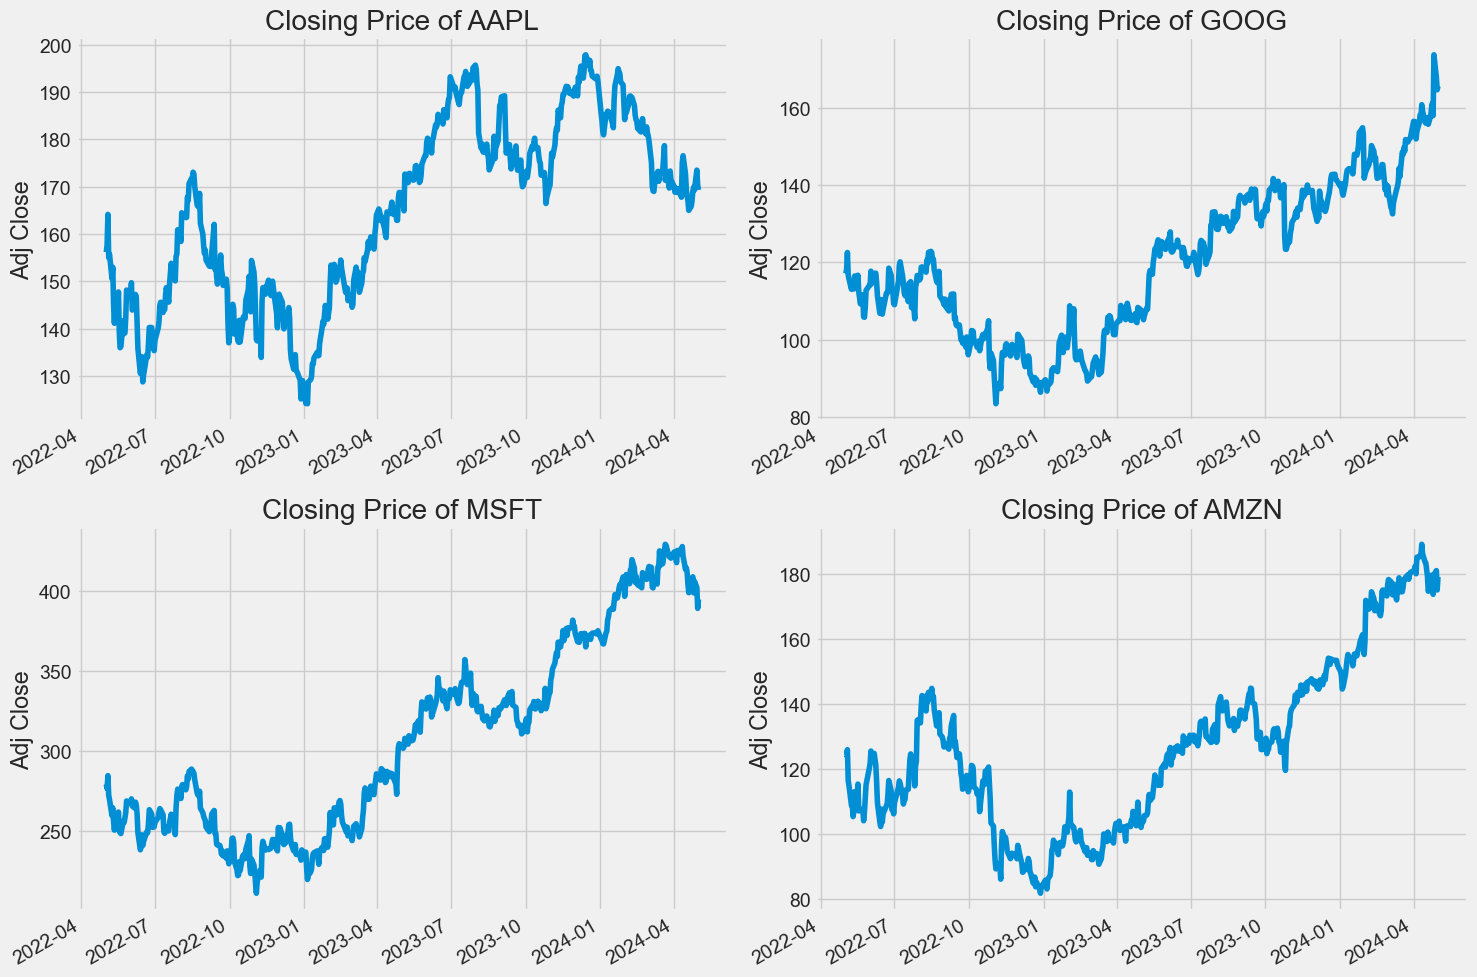

In [9]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {tech_list[i-1]}')

plt.tight_layout()

### Данные об объеме торгов

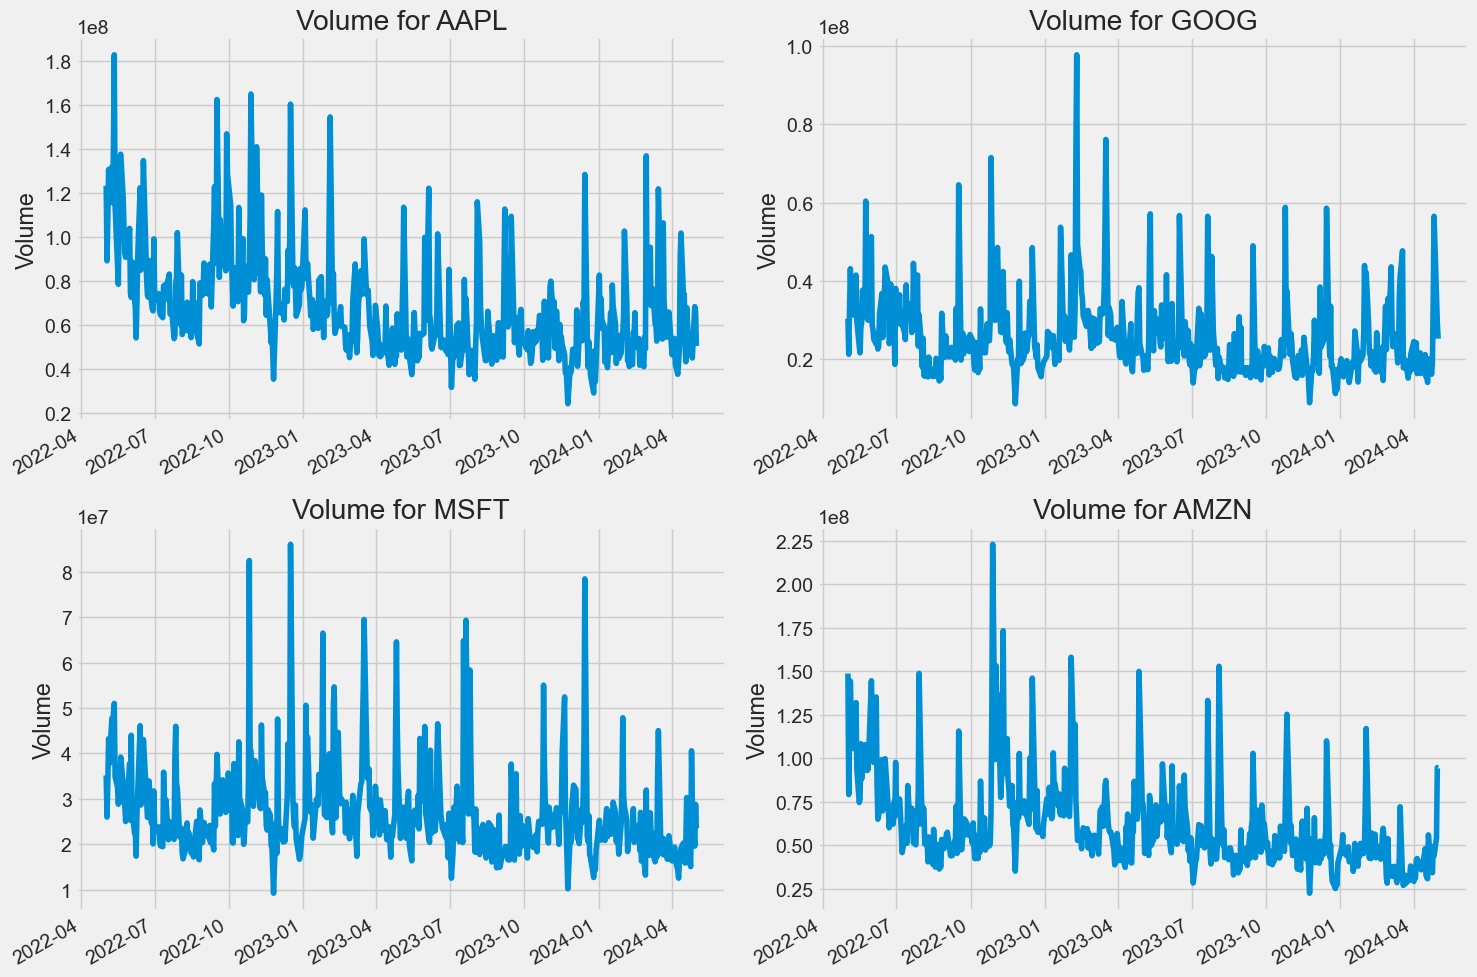

In [10]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f'Volume for {tech_list[i-1]}')

plt.tight_layout()

### Модель MA (moving average) скользящее среднее

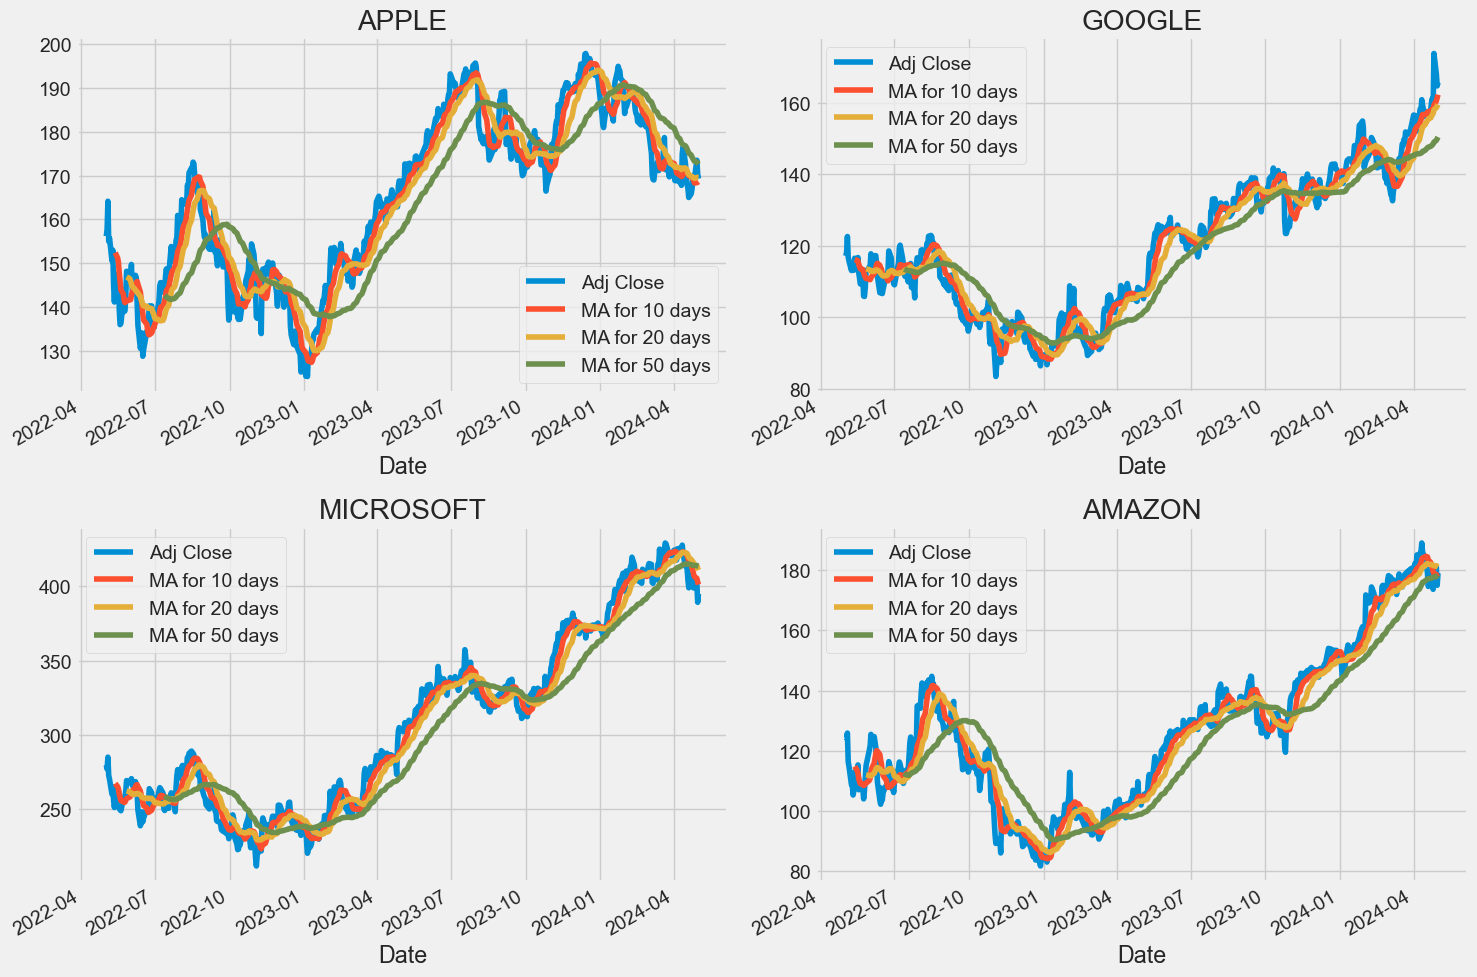

In [11]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()
